# Informe de la Práctica 1 

**- Albert Salom Vanrell**

**- Àngel Jiménez Sanchis**


## Contextualización

El objetivo de esta práctica es desarrollar y evaluar un modelo de aprendizaje automático basado en máquinas de vectores de soporte (SVM) para clasificar correctamente imágenes de caras de perros y gatos usando el conjunto de datos "Dog and Cat Detection" de Kaggle.

Para ello, se ha utilizado el Histogram of Oriented Gradients (HoG), que procesa las imágenes del conjunto de datos basándose en una configuración específica de parámetros establecida por nosotros y devuelve un vector de características, el cuál se guarda en un fichero.

Este fichero de características, junto con el fichero donde guardamos las etiquetas serán nuestras "X" e "y" del modelo SVM respectivamente.

Este modelo SVM, se ha entrenado usando 3 tipos distintos de Kernels (Lineal, Polinómico y RBF), donde sus hiperparámetros se ajustaron mediante la búsqueda exhaustiva (Grid Search) combinada con el método K-Fold, posible gracias a la función "GridSearchCV". 

Por tanto, para cada tipo de kernel, con "best_estimator" guardamos el mejor modelo encontrado por "GridSearchCV" y con "best_params" obtenemos cuales han sido sus mejores hiperparámetros. De la misma forma, con "best_score", obtenemos la mejor precisión media obtenida por el modelo.

Finalmente, después de entrenar y seleccionar el mejor modelo para cada tipo de kernel, realizamos la predicción con las muestras guardadas para el test y se procede con su evaluación para ver cuál de ellos obtiene mejores resultados, usando métricas como "accuracy, precision, recall, F1..."


## Estudio del HoG

(PARA NO PERDER LA INFO --->)
Configuración Óptima de HoG para Imágenes 64x64
Para imágenes de 64x64 píxeles:

Configuración recomendada: ppc=(8, 8), cpb=(2, 2), o=9.
Razonamiento: Con ppc=(8, 8), cada celda tendrá 8x8 píxeles, lo que permite capturar detalles sin ser demasiado sensible al ruido o variaciones menores en la imagen. El cpb=(2, 2) proporciona un buen equilibrio entre la captura de información de contraste y la prevención del overfitting al normalizar sobre bloques suficientemente grandes. Finalmente, o=9 ofrece una buena cobertura de las orientaciones de los gradientes sin ser excesivamente complejo.
Experimentación con Otras Configuraciones
ppc=(4, 4), cpb=(2, 2), o=9:

Observación: Proporciona características muy detalladas. Sin embargo, en imágenes con fondos complejos, este ajuste puede capturar demasiado ruido y detalles innecesarios, llevando a overfitting.
ppc=(4, 4), cpb=(8, 8), o=9:

Problema: La configuración cpb=(8, 8) en una imagen pequeña puede llevar a bloques que abarquen casi toda la imagen, reduciendo la capacidad de capturar variaciones locales importantes y siendo ineficaz en la normalización contra variaciones de iluminación y sombra.
ppc=(6, 6), cpb=(2, 2), o=9:

Observación: Intermedio entre las dos configuraciones anteriores, puede ser una alternativa viable pero aún puede no ser óptima para detectar patrones finos en imágenes pequeñas.
ppc=(8, 8), cpb=(4, 4), o=12:

Análisis: Aumentar el número de orientaciones a 12 aumenta la dimensionalidad del descriptor, lo cual puede ser útil para imágenes más complejas o de mayor resolución, pero en imágenes de 64x64 podría ser más de lo necesario y podría contribuir al overfitting.
Impacto de los Fondos en la Extracción de Características HoG
Fondos Simples vs. Complejos: Los fondos simples permiten que HoG capture eficientemente las características relevantes de los objetos de interés (perros y gatos en este caso) sin distracciones. En contraste, los fondos complejos pueden introducir gradientes irrelevantes que podrían confundirse con características importantes del objeto de interés, especialmente con configuraciones de HoG que capturan detalles muy finos (ppc=(4, 4)).
Conclusión
Para redactar esta sección de tu informe, describe cómo cada configuración fue evaluada con las imágenes proporcionadas, destacando cómo los fondos afectan la efectividad de cada configuración de HoG. Esta evaluación te permitirá justificar la elección de la configuración óptima basada en un equilibrio entre detalle, robustez y prevención de overfitting, adaptada a las características específicas del conjunto de datos utilizado.

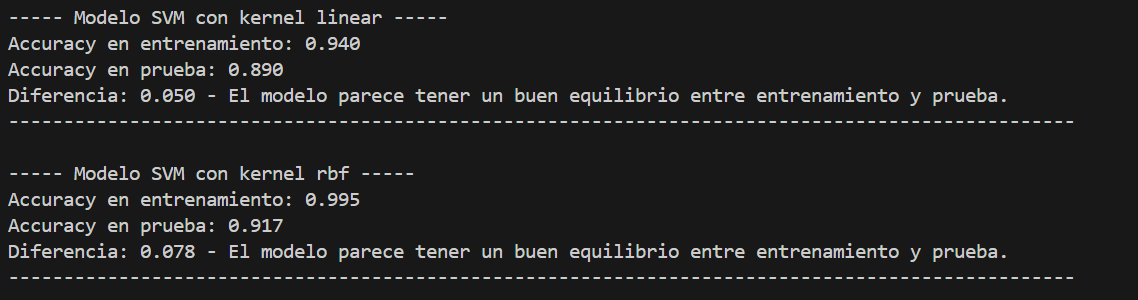